# 중고차 가격 예측 보고서

# 데이터 확인 및 전처리

In [1]:
import pandas as pd

car = pd.read_csv('C:\githome\hipython_rep\data\Dubizzle_used_car_sales.csv')
car.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


## 결측치 확인

In [2]:
# 각 컬럼별 결측지 개수 확인
missing_counts = car.isnull().sum()
print("--- 각 컬럼별 결측치 개수 ---")
print(missing_counts)

# 전체 데이터프레임의 결측치 총 개수 확인
total_missing = car.isnull().sum().sum()
print(f"\n--- 전체 데이터프레임의 결측치 총 개수: {total_missing}개 ---")

--- 각 컬럼별 결측치 개수 ---
title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          81
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

--- 전체 데이터프레임의 결측치 총 개수: 1084개 ---


결측치가 확인된 행은 'title', 'no_of_cylinders', 'year', 그리고 'motors_trim'이다.

## 결측치 처리

In [3]:
# 각 컬럼별 결측치 비율 확인
missing_percentage = (car.isnull().sum() / len(car)) * 100
print("\n--- 각 컬럼별 결측치 비율 (%) ---")
print(missing_percentage)


--- 각 컬럼별 결측치 비율 (%) ---
title                   0.050150
price_in_aed            0.000000
kilometers              0.000000
body_condition          0.000000
mechanical_condition    0.000000
seller_type             0.000000
body_type               0.000000
no_of_cylinders         0.812437
transmission_type       0.000000
regional_specs          0.000000
horsepower              0.000000
fuel_type               0.000000
steering_side           0.000000
year                    9.729188
color                   0.000000
emirate                 0.000000
motors_trim             0.280843
company                 0.000000
model                   0.000000
date_posted             0.000000
dtype: float64


In [4]:
# 'year' 결측치는 중앙값으로 대체
if 'year' in car.columns:
    median_year = car['year'].median()
    car['year'].fillna(median_year, inplace=True)

# 나머지 결측치는 행 단위로 삭제 (year 제외)
car = car.dropna()

# 결과 확인
print("결측치 처리 후 정보:")
print(car.info())


결측치 처리 후 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 9856 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9856 non-null   object 
 1   price_in_aed          9856 non-null   int64  
 2   kilometers            9856 non-null   int64  
 3   body_condition        9856 non-null   object 
 4   mechanical_condition  9856 non-null   object 
 5   seller_type           9856 non-null   object 
 6   body_type             9856 non-null   object 
 7   no_of_cylinders       9856 non-null   object 
 8   transmission_type     9856 non-null   object 
 9   regional_specs        9856 non-null   object 
 10  horsepower            9856 non-null   object 
 11  fuel_type             9856 non-null   object 
 12  steering_side         9856 non-null   object 
 13  year                  9856 non-null   float64
 14  color                 9856 non-null   object 
 15  emirate      

C:\Users\Admin\AppData\Local\Temp\ipykernel_11256\3221419160.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car['year'].fillna(median_year, inplace=True)


결측치를 처리하는 방법으로는
1. 결측치가 있는 행 삭제
2. 결측치 대체 (평균 / 중앙값 / 최빈값)
등이 있다. 

결측치의 비율이 5%이하인 'title', 'no_of_cylinders', 그리고 'motors_trim'는 결측치가 있는 행을 제거하였다. 결측치 비율이 5%초과인 'year'은 중앙값으로 대체하였다. 

---

'year' 변수의 결측치를 처리함에 있어 중앙값을 대체값으로 선택한 이유는, 해당 변수의 최빈값과 중앙값이 모두 2016으로 동일하게 나타났고, 평균값은 2015.63으로 다소 근접한 분포를 보였기 때문이다. 

이러한 결과에서 중앙값을 사용하는 것이 평균 대비 이상치의 영향을 줄이면서도 대표값의 성격을 유지할 수 있기 때문에, 결측치를 중앙값으로 대체하는 것이 통계적으로 타당하고 안정적인 방법이라 판단되었다. 또한, 최빈값과 일치한다는 점에서 해당 연도가 데이터의 중심 경향을 잘 반영하고 있다는 근거가 되며, 분석 결과의 왜곡 가능성을 최소화할 수 있다.

## 이상치 확인

In [5]:
import numpy as np

# 수치형 컬럼만 추출
numeric_cols = car.select_dtypes(include=[np.number]).columns

# 이상치 탐지 결과 저장할 딕셔너리
outlier_summary = {}

# 각 수치형 컬럼에 대해 IQR 방식으로 이상치 탐지
for col in numeric_cols:
    Q1 = car[col].quantile(0.25)
    Q3 = car[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = car[(car[col] < lower_bound) | (car[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    outlier_summary[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# 이상치 탐지 요약 출력
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


              Lower Bound  Upper Bound  Outlier Count
price_in_aed    -219998.5     499997.5         1096.0
kilometers      -139125.5     297902.5          112.0
year               2006.5       2026.5          274.0


In [6]:
import numpy as np
import pandas as pd

# 수치형 컬럼만 추출
numeric_cols = car.select_dtypes(include=[np.number]).columns

# 결과 저장용 리스트
outlier_ratio_list = []

# 전체 데이터 수
total_rows = len(car)

# 각 수치형 변수에 대해 이상치 비율 계산
for col in numeric_cols:
    Q1 = car[col].quantile(0.25)
    Q3 = car[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = car[(car[col] < lower_bound) | (car[col] > upper_bound)].shape[0]
    outlier_ratio = (outlier_count / total_rows) * 100

    outlier_ratio_list.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Total Rows': total_rows,
        'Outlier Ratio (%)': round(outlier_ratio, 2)
    })

# 결과를 데이터프레임으로 정리
outlier_ratio_df = pd.DataFrame(outlier_ratio_list)

# 출력
print(outlier_ratio_df)

         Column  Outlier Count  Total Rows  Outlier Ratio (%)
0  price_in_aed           1096        9856              11.12
1    kilometers            112        9856               1.14
2          year            274        9856               2.78


이상치 처리방법을 선택하기 위해 이상치 비율을 확인하였다.확인결과 kilometers와 year의 이상치는 5% 이하로 삭제해도 데이터에 큰 영향을 주지 못하지만 price_in_aed의 이상치는 11.23%로 삭제하면 결과에 영향을 줄 수 있다. 따라서 kilometers의 이상치는 삭제하고 price_in_aed의 이상치는 중앙값으로 대체하겠다.

In [7]:
import pandas as pd

# price_in_aed 이상치를 중앙값으로 대체
if 'price_in_aed' in car.columns:
    Q1 = car['price_in_aed'].quantile(0.25)
    Q3 = car['price_in_aed'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_price = car['price_in_aed'].median()

    # 이상치만 중앙값으로 대체
    car['price_in_aed'] = car['price_in_aed'].apply(
        lambda x: median_price if (x < lower_bound or x > upper_bound) else x
    )

# kilometers와 year 이상치는 삭제
for col in ['kilometers', 'year']:
    if col in car.columns:
        Q1 = car[col].quantile(0.25)
        Q3 = car[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치가 아닌 행만 남김
        car = car[(car[col] >= lower_bound) & (car[col] <= upper_bound)]

print("이상치 처리 완료. 데이터 요약:")
print(car.describe())

이상치 처리 완료. 데이터 요약:
        price_in_aed     kilometers         year
count    9493.000000    9493.000000  9493.000000
mean   124650.751817   82508.265985  2016.130201
std    101306.935995   66631.817385     3.242370
min      8999.000000       0.000000  2007.000000
25%     54000.000000   23000.000000  2014.000000
50%    100000.000000   74000.000000  2016.000000
75%    155000.000000  130000.000000  2019.000000
max    499000.000000  295000.000000  2021.000000


# 상관관계 확인

In [8]:
from sklearn.preprocessing import LabelEncoder

# 문자열(object) 컬럼만 선택
object_cols = car.select_dtypes(include=['object']).columns

# 각 문자열 컬럼에 대해 Label Encoding 적용
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    car[col] = le.fit_transform(car[col].astype(str))  # NaN 있으면 str 처리 후 인코딩
    label_encoders[col] = le  # 나중에 역변환 등을 위해 저장

# 확인
print("변환된 데이터 타입:")
print(car.dtypes[object_cols])

변환된 데이터 타입:
title                   int64
body_condition          int64
mechanical_condition    int64
seller_type             int64
body_type               int64
no_of_cylinders         int64
transmission_type       int64
regional_specs          int64
horsepower              int64
fuel_type               int64
steering_side           int64
color                   int64
emirate                 int64
motors_trim             int64
company                 int64
model                   int64
date_posted             int64
dtype: object


상관관계를 확인하기에 앞서 문자형 데이터를 모두 숫자형으로 바꿨다. 

상관관계 (price_in_aed 기준):
 price_in_aed            1.000000
year                    0.378365
no_of_cylinders         0.171186
body_condition          0.061811
mechanical_condition    0.048346
date_posted             0.026070
model                   0.020853
horsepower              0.005103
steering_side          -0.010697
motors_trim            -0.021678
regional_specs         -0.025521
company                -0.050236
transmission_type      -0.051713
fuel_type              -0.061290
color                  -0.064216
emirate                -0.069180
body_type              -0.083395
title                  -0.109447
seller_type            -0.165292
kilometers             -0.451670
Name: price_in_aed, dtype: float64


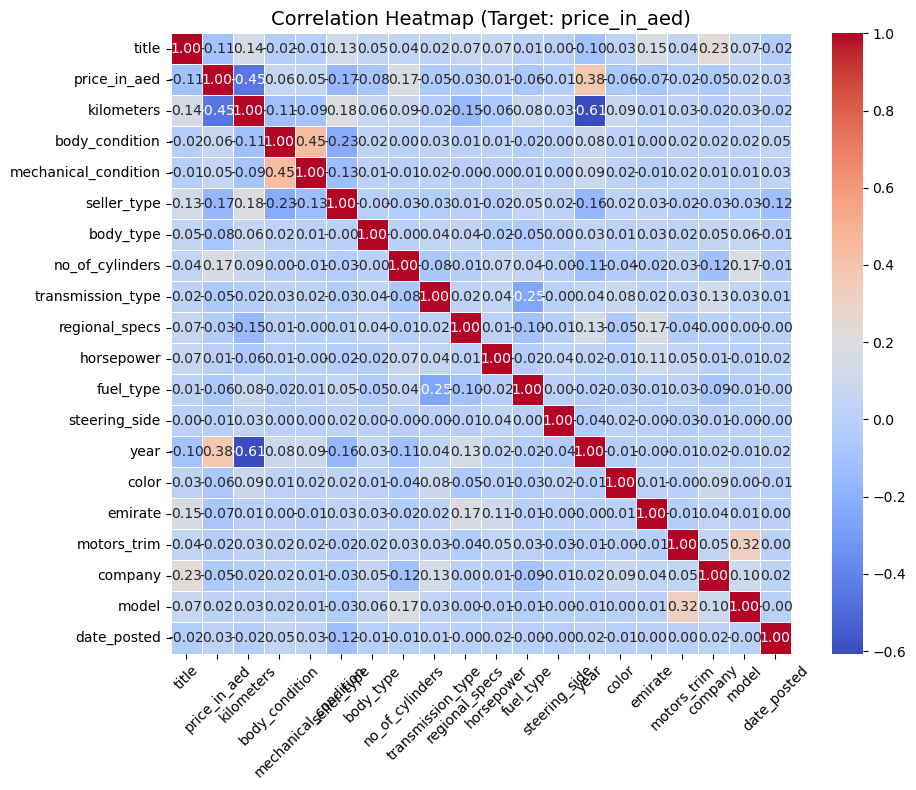

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들만 선택
numeric_cols = car.select_dtypes(include='number')

# 'price_in_aed' 컬럼과의 상관관계 계산
correlations = car.corr(numeric_only=True)['price_in_aed'].sort_values(ascending=False)
print("상관관계 (price_in_aed 기준):\n", correlations)

# 상관계수 행렬 계산
corr_matrix = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Target: price_in_aed)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 모델 만들기

In [10]:
X = car.drop(['price_in_aed','title'], axis=1).values
y = car['price_in_aed'].values
car.shape

(9493, 20)

# 스케일러 객체 생성

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([ 94648.09100887, 179102.54459983, 199098.68053077])

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 평가

## 단독 모델

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 교차검증 없이 단일 평가
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

mse_no_cv = mean_squared_error(y_test, preds)
rmse_no_cv = np.sqrt(mse_no_cv)
r2_no_cv = r2_score(y_test, preds)

print("[Linear Regression] 교차검증 없이 평가")
print(f"MSE: {mse_no_cv:.2f}")
print(f"RMSE: {rmse_no_cv:.2f}")
print(f"R²: {r2_no_cv:.4f}")

# 교차검증 적용한 평가
model_cv = LinearRegression()
neg_mse_scores = cross_val_score(model_cv, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model_cv, X, y, scoring='r2', cv=5)

mse_cv = -1 * np.mean(neg_mse_scores)
rmse_cv = np.mean(np.sqrt(-neg_mse_scores))
r2_cv = np.mean(r2_scores)

print("\n[Linear Regression] 교차검증 평균 평가")
print(f"평균 MSE: {mse_cv:.2f}")
print(f"평균 RMSE: {rmse_cv:.2f}")
print(f"평균 R²: {r2_cv:.4f}")

[Linear Regression] 교차검증 없이 평가
MSE: 8279479535.25
RMSE: 90991.65
R²: 0.2085

[Linear Regression] 교차검증 평균 평가
평균 MSE: 7232315877.27
평균 RMSE: 85015.13
평균 R²: 0.2949


**결론**\
선형 회귀 모델은 price_in_aed를 예측하는 데 있어 전체 분산의 약 29.5% 정도만 설명하고 있으며, 평균적으로 약 85015 정도의 오차가 발생하고 있다. 교차검증 결과 또한 단일 평가 결과와 유사하여 모델의 일반화 성능은 일정 수준 유지되고 있으나, 복잡한 비선형 관계를 잘 설명하지 못할 가능성이 있다. 

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 교차검증 없이 단일 평가
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_mse_no_cv = mean_squared_error(y_test, rf_preds)
rf_rmse_no_cv = np.sqrt(rf_mse_no_cv)
rf_r2_no_cv = r2_score(y_test, rf_preds)

print("[Random Forest] 교차검증 없이 평가")
print(f"MSE: {rf_mse_no_cv:.2f}")
print(f"RMSE: {rf_rmse_no_cv:.2f}")
print(f"R²: {rf_r2_no_cv:.4f}")

# 교차검증 적용한 평가 
rf_cv_model = RandomForestRegressor(n_estimators=100, random_state=42)

neg_mse_scores_rf = cross_val_score(rf_cv_model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores_rf = cross_val_score(rf_cv_model, X, y, scoring='r2', cv=5)

rf_mse_cv = -1 * np.mean(neg_mse_scores_rf)
rf_rmse_cv = np.mean(np.sqrt(-neg_mse_scores_rf))
rf_r2_cv = np.mean(r2_scores_rf)

print("\n[Random Forest] 교차검증 평균 평가")
print(f"평균 MSE: {rf_mse_cv:.2f}")
print(f"평균 RMSE: {rf_rmse_cv:.2f}")
print(f"평균 R²: {rf_r2_cv:.4f}")


[Random Forest] 교차검증 없이 평가
MSE: 2980215358.74
RMSE: 54591.35
R²: 0.7151

[Random Forest] 교차검증 평균 평가
평균 MSE: 2744124533.70
평균 RMSE: 52330.00
평균 R²: 0.7330


**결론**\
Random Forest 회귀 모델은 선형 회귀에 비해 훨씬 낮은 예측 오차(RMSE)와 높은 설명력(R²)을 보이며, price_in_aed 예측에 있어 더 우수한 성능을 나타내고 있다. 특히 교차검증 결과가 단일 평가 결과와 유사하거나 더 좋게 나타나는 점에서, 모델의 일반화 성능도 우수하다고 판단된다. 따라서 실제 적용에 있어서도 유리한 모델이라 할 수 있다.

## 다항회귀

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state = 156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train) 

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [17]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(1.456612680416239e+36)

In [18]:
r2_score(y_test, pred_poly)

np.float64(-1.3924016785410745e+26)

MSE: 1.456612680416239e+36
- 평균 제곱 오차(MSE)가 비정상적으로 크다. 이는 예측값이 실제값과 엄청나게 차이가 난다는 것을 의미한다. 즉, 모델이 거의 무작위에 가까운 예측을 하고 있을 가능성이 높다.

R²: -1.3924016785410745e+26
- 결정계수(R²)가 -2.53 × 10^18이라는 것은 모델이 무작위 예측보다도 훨씬 못한 성능이라는 뜻이다. 

R² 값은 일반적으로:
- 1: 완벽한 예측
- 0: 예측력이 없음 (평균값만큼 예측)
- 0 미만: 무작위보다 못한 예측

따라서 이 값은 극단적으로 잘못 학습된 모델임을 나타낸다.

## XGB

In [19]:
from xgboost import XGBRegressor

In [20]:
xgb = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)
evals = [(X_test_scaled, y_test)]
xgb.fit(X_train_scaled, y_train, early_stopping_rounds=40, 
        eval_set=evals, verbose=True)
xgb_pred = xgb.predict(X_test_scaled)

[0]	validation_0-rmse:150762.42439
[1]	validation_0-rmse:140786.79299
[2]	validation_0-rmse:132078.35182
[3]	validation_0-rmse:124541.55913
[4]	validation_0-rmse:118080.47540
[5]	validation_0-rmse:112339.31188
[6]	validation_0-rmse:107453.09691
[7]	validation_0-rmse:103045.11087
[8]	validation_0-rmse:99482.04837
[9]	validation_0-rmse:95980.33957
[10]	validation_0-rmse:93167.76337
[11]	validation_0-rmse:90574.99875
[12]	validation_0-rmse:88592.80565
[13]	validation_0-rmse:86583.60587
[14]	validation_0-rmse:84923.22268
[15]	validation_0-rmse:83579.24022
[16]	validation_0-rmse:82248.25046
[17]	validation_0-rmse:81150.74755
[18]	validation_0-rmse:80301.76657
[19]	validation_0-rmse:79534.30985
[20]	validation_0-rmse:78700.01845
[21]	validation_0-rmse:77945.66946
[22]	validation_0-rmse:77464.67385
[23]	validation_0-rmse:77013.55002
[24]	validation_0-rmse:76410.63561
[25]	validation_0-rmse:76063.00118
[26]	validation_0-rmse:75740.66845
[27]	validation_0-rmse:75493.30202
[28]	validation_0-rmse

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[106]	validation_0-rmse:66009.17100
[107]	validation_0-rmse:65893.35828
[108]	validation_0-rmse:65753.42918
[109]	validation_0-rmse:65569.29650
[110]	validation_0-rmse:65462.60101
[111]	validation_0-rmse:65445.48370
[112]	validation_0-rmse:65337.13520
[113]	validation_0-rmse:65324.56974
[114]	validation_0-rmse:65282.50422
[115]	validation_0-rmse:65220.16668
[116]	validation_0-rmse:65171.66958
[117]	validation_0-rmse:65202.28125
[118]	validation_0-rmse:65113.13286
[119]	validation_0-rmse:65050.03686
[120]	validation_0-rmse:64986.59257
[121]	validation_0-rmse:64933.56874
[122]	validation_0-rmse:64905.84406
[123]	validation_0-rmse:64893.89138
[124]	validation_0-rmse:64842.60419
[125]	validation_0-rmse:64771.17365
[126]	validation_0-rmse:64740.28352
[127]	validation_0-rmse:64733.55239
[128]	validation_0-rmse:64713.25504
[129]	validation_0-rmse:64635.93415
[130]	validation_0-rmse:64589.49426
[131]	validation_0-rmse:64547.02084
[132]	validation_0-rmse:64440.20150
[133]	validation_0-rmse:6442

In [21]:
mse = mean_squared_error(y_test,xgb_pred)
rmse = np.sqrt(mse)

rmse, mse

(np.float64(57526.19641844826), np.float64(3309263274.373889))

In [22]:
r2_score(y_test, xgb_pred)

np.float64(0.6836617036276376)

**결론**\
XGBoost 회귀 모델은 price_in_aed를 예측하는 데 있어 우수한 성능을 보이는 모델이라 할 수 있다. 낮은 RMSE와 높은 R² 값은 이 모델이 데이터에 잘 맞으며 일반화 능력 또한 뛰어남을 시사한다. 특히 다항회귀나 선형 회귀와 비교했을 때 예측 정확도가 확연히 향상되었음을 확인할 수 있다.

## 규제회귀 모델

### Ridge

In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled,y_train)
pred_ridge = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, pred_ridge)
r2 = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(7429157112.931679), np.float64(0.2898338059754194))

In [24]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
ridge_preds = ridge_cv.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'ridge cv mse : {ridge_mse:.4f}, r2 : {ridge_r2:.4f}')

ridge cv mse : 7429565579.3886, r2 : 0.2898


In [25]:
ridge_cv.alpha_

np.float64(100.0)

In [26]:
ridge_cv.coef_

array([-34527.12534025,    568.20367069,  -1238.04805192,  -6149.69747549,
        -5276.86173545,  21506.87417319,  -5866.77009021, -10274.8277645 ,
        -2708.04806363,  -8002.30578987,      0.        ,  19633.01434019,
        -2867.92797266,  -4047.12532212,  -1874.31404476,  -3558.05785401,
          863.05501454,    909.86889095])

**결론**\
Ridge 회귀 모델은 과적합을 방지하기 위해 규제를 적용한 선형 모델이며, 이 경우 α=100이 선택되었다. 그러나 평가 지표(RMSE, R²)를 보면 일반 선형 회귀와 큰 차이가 없으며, 예측력은 낮은 수준이다. 따라서 이 데이터셋에서는 Ridge보다는 비선형 모델이 더 나은 성능을 보이는 것으로 판단된다.

### Lasso

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)
pred_lasso = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, pred_lasso)
r2 = r2_score(y_test, pred_lasso)
mse, r2

(np.float64(7429161317.660187), np.float64(0.2898334040380265))

In [28]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
lasso_preds = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)
print(f'ridge cv mse : {lasso_mse:.4f}, r2 : {lasso_r2:.4f}')

ridge cv mse : 7428913846.5768, r2 : 0.2899


In [29]:
lasso_cv.alpha_

np.float64(10.0)

In [30]:
lasso_cv.coef_

array([-35108.07759392,    520.61614018,  -1275.91063409,  -6123.46369854,
        -5302.89557001,  21889.77237498,  -5950.67608936, -10513.10939241,
        -2800.53130437,  -8127.29125823,      0.        ,  19653.54634066,
        -2844.09773831,  -4019.50629108,  -1857.32907203,  -3556.42902282,
          813.61862361,    922.23537912])

**결론**\
Lasso 회귀 모델은 price_in_aed 예측에 있어 Ridge나 일반 선형 회귀와 거의 동일한 수준의 성능(R² 약 0.29)을 보였다. 이 데이터셋에서는 Lasso보다는 비선형 모델(예: XGBoost, Random Forest)이 더 유효한 선택으로 판단된다. Lasso는 다만 해석 가능한 모델이 필요한 경우에 유용하게 사용될 수 있다.

### ElasticNet

In [31]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.1)

In [32]:
enet_pred = enet.predict(X_test_scaled)

mse = mean_squared_error(y_test, enet_pred)
r2 = r2_score(y_test, enet_pred)
mse, r2

(np.float64(7434083132.031523), np.float64(0.28936291914631473))

**결론**\
ElasticNet 모델은 Lasso와 Ridge의 장점을 결합한 모델이지만, 이번 데이터에서는 성능(R² 약 0.29)이 Ridge/Lasso 단일 모델과 차이가 거의 없었다. 이는 데이터가 선형 모델로 설명하기 어려운 구조를 가지고 있을 가능성을 시사하며, 보다 강력한 비선형 모델(XGBoost, Random Forest 등)이 필요한 상황으로 보인다. ElasticNet은 다만 과적합 방지, 다중공선성 완화, 특성 해석이 필요한 상황에서 유용하게 활용될 수 있다.

# 모델 성능 비교

In [33]:
results = pd.DataFrame({
    '모델' : ['다항회귀', 'XGB', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
    'RMSE' : [np.sqrt(mean_squared_error(y_test,pred_poly)),
             np.sqrt(mean_squared_error(y_test,xgb_pred)),
             np.sqrt(mean_squared_error(y_test,pred_ridge)),
             np.sqrt(mean_squared_error(y_test,pred_lasso)),
             np.sqrt(mean_squared_error(y_test,enet_pred))],
    'R2' : [r2_score(y_test,pred_poly),
            r2_score(y_test,xgb_pred),
            r2_score(y_test,pred_ridge),
            r2_score(y_test,pred_lasso),
            r2_score(y_test,enet_pred)]
})
results

,모델,RMSE,R2
0,다항회귀,1.206902e+18,-1.392402e+26
1,XGB,5.752620e+04,6.836617e-01
2,릿지회귀,8.619256e+04,2.898338e-01
3,라쏘회귀,8.619258e+04,2.898334e-01
4,엘라스틱넷회귀,8.622113e+04,2.893629e-01


# 결론

본 프로젝트는 중고차의 다양한 특성을 활용하여 차량 시세(price_in_aed)를 예측할 수 있는 회귀 기반 머신러닝 모델을 개발하는 것을 목표로 하였다. 이를 위해 데이터 전처리, 이상치 처리, 인코딩 및 스케일링을 수행하였고, 다항회귀, XGBoost, 릿지 회귀, 라쏘 회귀, 엘라스틱넷 회귀 모델을 적용하여 성능을 비교하였다.

최종 모델 평가 결과는 다음과 같았다. 다항회귀 모델의 RMSE는 1.21e+18, R²는 -1.39e+26으로, 수치적으로 매우 큰 오차와 음의 결정계수를 기록하였다. 이는 다항회귀가 극단적으로 과적합(overfitting)되었거나 수치적 불안정성(numerical instability)이 발생했음을 의미한다. 따라서 본 실험에서는 다항회귀 모델을 실패한 모델로 간주할 수 있다.

반면, XGBoost 모델은 RMSE가 약 57,526, R²는 약 0.6837로, 가장 우수한 예측 성능을 보여주었다. 이는 XGBoost가 비선형 관계를 잘 학습할 수 있는 구조이며, 기본 설정만으로도 상당한 예측력을 확보할 수 있다는 점을 시사한다. 성능이 향후 하이퍼파라미터 튜닝을 통해 더욱 향상될 가능성도 높다.

릿지 회귀, 라쏘 회귀, 엘라스틱넷 회귀 모델은 모두 비슷한 성능을 보였다. 세 모델 모두 RMSE가 약 86,000대이며, R² 점수는 약 0.289 수준으로 XGBoost보다는 낮았다. 이는 선형 계열 모델들이 데이터의 복잡한 패턴을 충분히 반영하지 못했음을 보여준다. 다만, 이들 모델은 과적합 위험이 낮고 해석이 용이하다는 장점이 있기 때문에, 상황에 따라 보조적 모델로 활용될 수 있다.

결과적으로, 본 프로젝트에서는 XGBoost 모델이 중고차 시세 예측에 가장 적합한 회귀 모델임을 확인하였다. 다른 모델들과 비교했을 때 예측 오차는 가장 낮았으며, 설명력(R²)도 가장 높았다. 향후에는 XGBoost의 성능을 더욱 끌어올리기 위해 max_depth, learning_rate, subsample 등의 하이퍼파라미터 튜닝을 수행하고, 교차검증 기반으로 일반화 성능을 점검하는 것이 바람직할 것이다. 또한, 변수 중요도 분석(SHAP 등)을 통해 중고차 시세 결정 요인을 시각화하고 해석하는 작업도 함께 병행한다면, 실무 적용 가능성을 더욱 높일 수 있을 것이다.